In [ ]:
# Import Google Drive and OS libraries
from google.colab import drive
import os

# Import data manipulation libraries
import pandas as pd
import numpy as np
import math

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import statistical and data processing functions
from scipy.stats import norm, skew
from sklearn.preprocessing import StandardScaler

# Import machine learning models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import tensorflow_decision_forests as tfdf

# Import model evaluation tools
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold, cross_val_score, train_test_split

# Suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Check if drive is already mounted
if not os.path.ismount('/content/drive'):
    drive.mount('/content/drive')
else:
    print("Google Drive is already mounted.")

warnings.filterwarnings('ignore')
%matplotlib inline

pd.set_option('display.max_columns', None)

Google Drive is already mounted.


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [ ]:
# Basic information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [ ]:
# Basic statistics
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


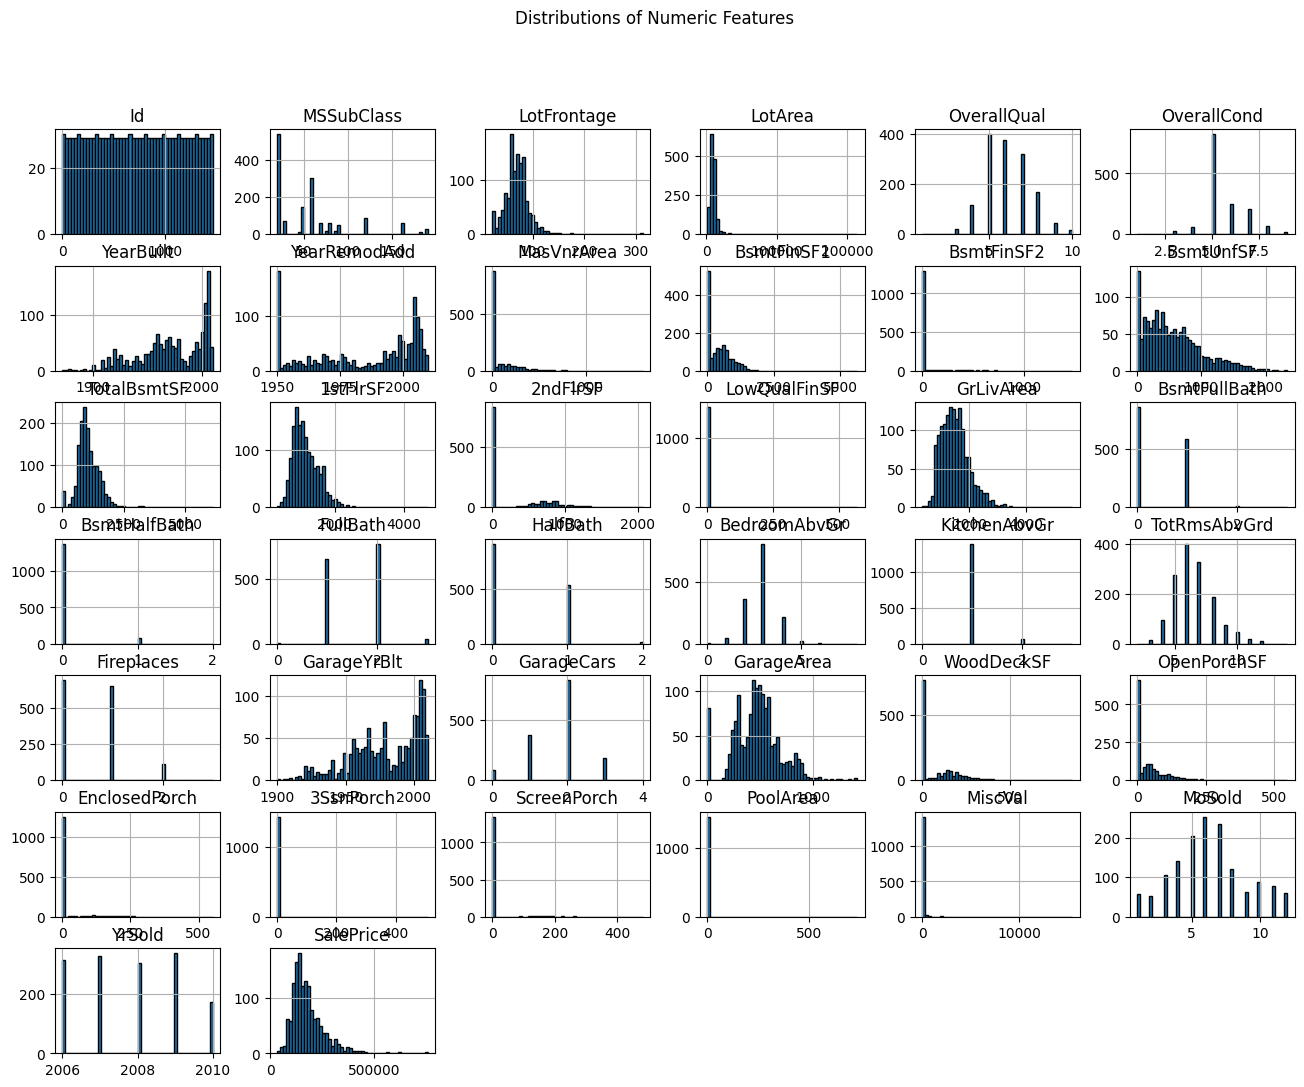

In [ ]:
# Histograms for all numerical features
df.select_dtypes(include=['float64', 'int64']).hist(figsize=(16, 12), bins=50, edgecolor="black")
plt.suptitle("Distributions of Numeric Features")
plt.show()

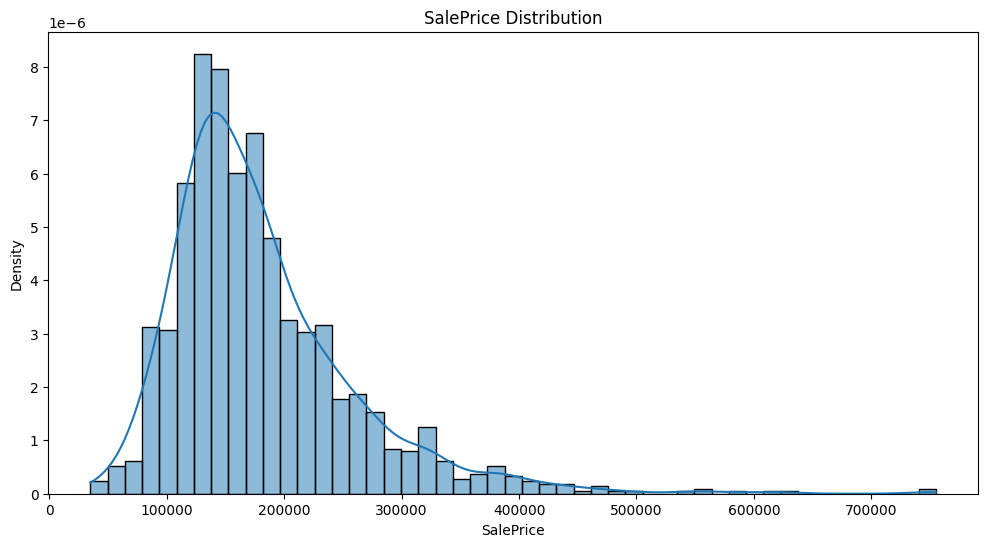

In [ ]:
# Visualize distributions of SalePrice and numerical features
plt.figure(figsize=(12, 6))
sns.histplot(df['SalePrice'], kde=True, stat='density')
plt.title("SalePrice Distribution")
plt.show()

In [ ]:
# Checking skewness and kurtosis
print("Skewness: {:.2f}".format(df['SalePrice'].skew()))
print("Kurtosis: {:.2f}".format(df['SalePrice'].kurt()))

Skewness: 1.88
Kurtosis: 6.54


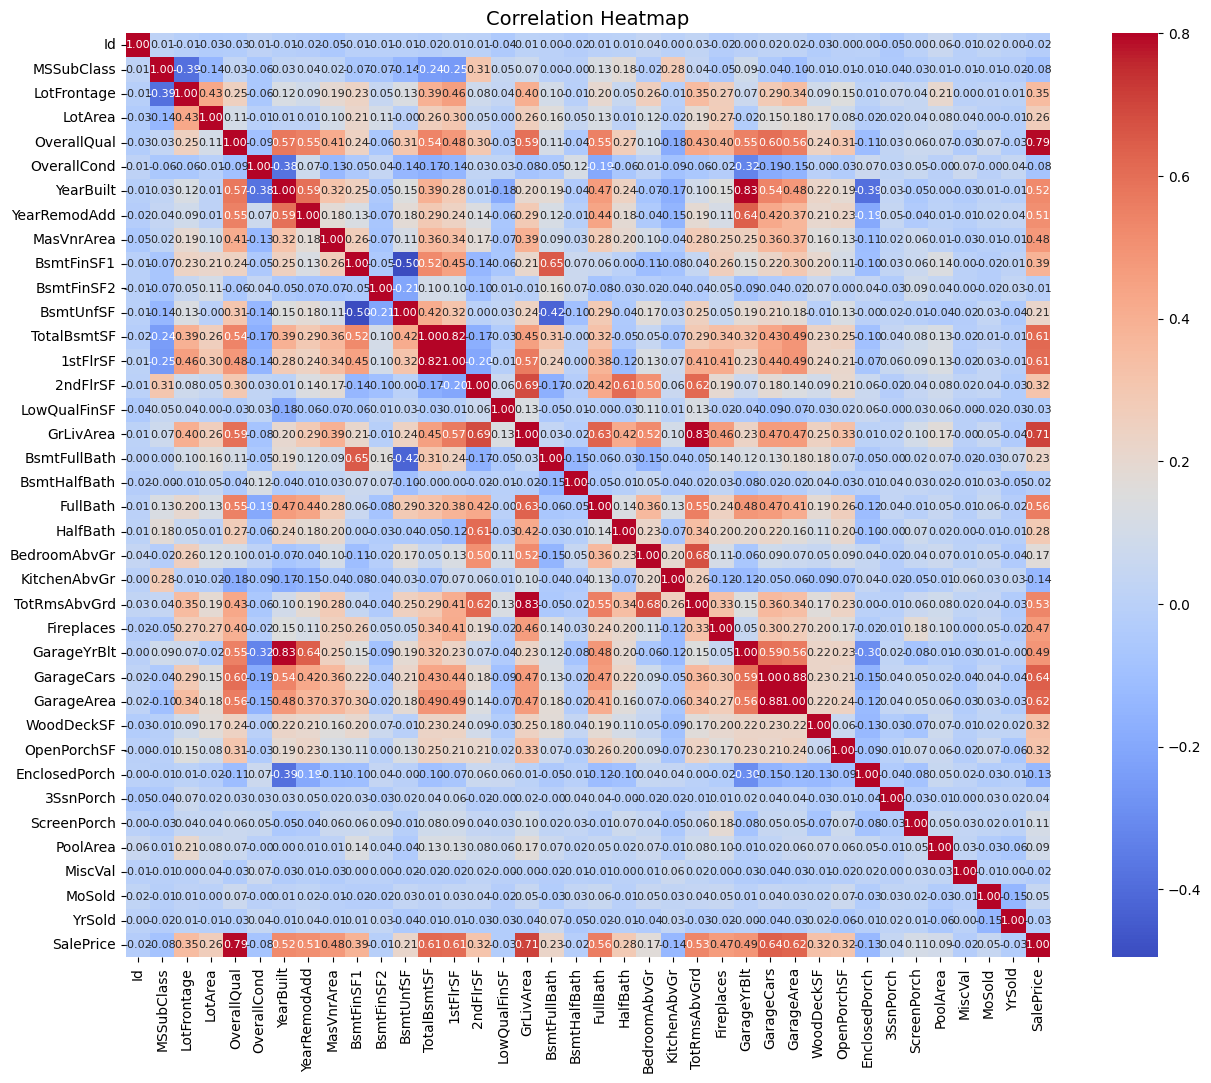

In [ ]:
# Calculate correlation matrix for only numeric columns
corrmat = df.select_dtypes(include=['float64', 'int64']).corr()

# Plot the correlation heatmap with adjusted figure size and annotation font size
plt.figure(figsize=(16, 12))
sns.heatmap(corrmat, vmax=0.8, square=True, annot=True, fmt=".2f", cmap="coolwarm",
            annot_kws={"size": 8})
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

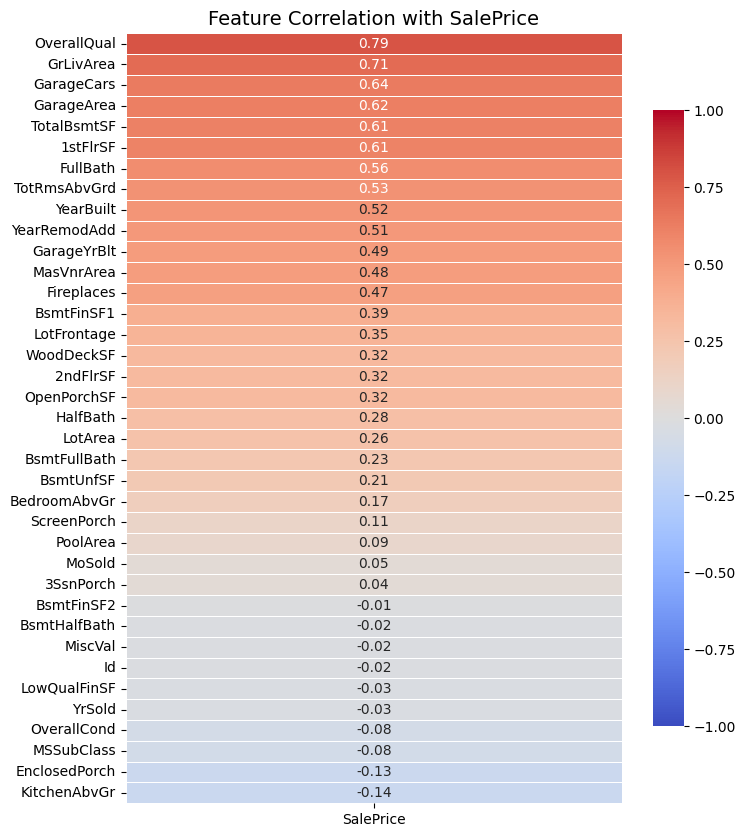

In [ ]:
# Calculate correlation matrix for only numeric columns
corrmat = df.select_dtypes(include=['float64', 'int64']).corr()

# Extract correlations with SalePrice, sort them, and drop SalePrice itself
saleprice_corr = corrmat['SalePrice'].sort_values(ascending=False).drop('SalePrice')

# Plot correlation heatmap for SalePrice only
plt.figure(figsize=(8, 10))
sns.heatmap(saleprice_corr.to_frame(), annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1,
            annot_kws={"size": 10}, cbar_kws={"shrink": .8}, linewidths=0.5)
plt.title("Feature Correlation with SalePrice", fontsize=14)
plt.show()

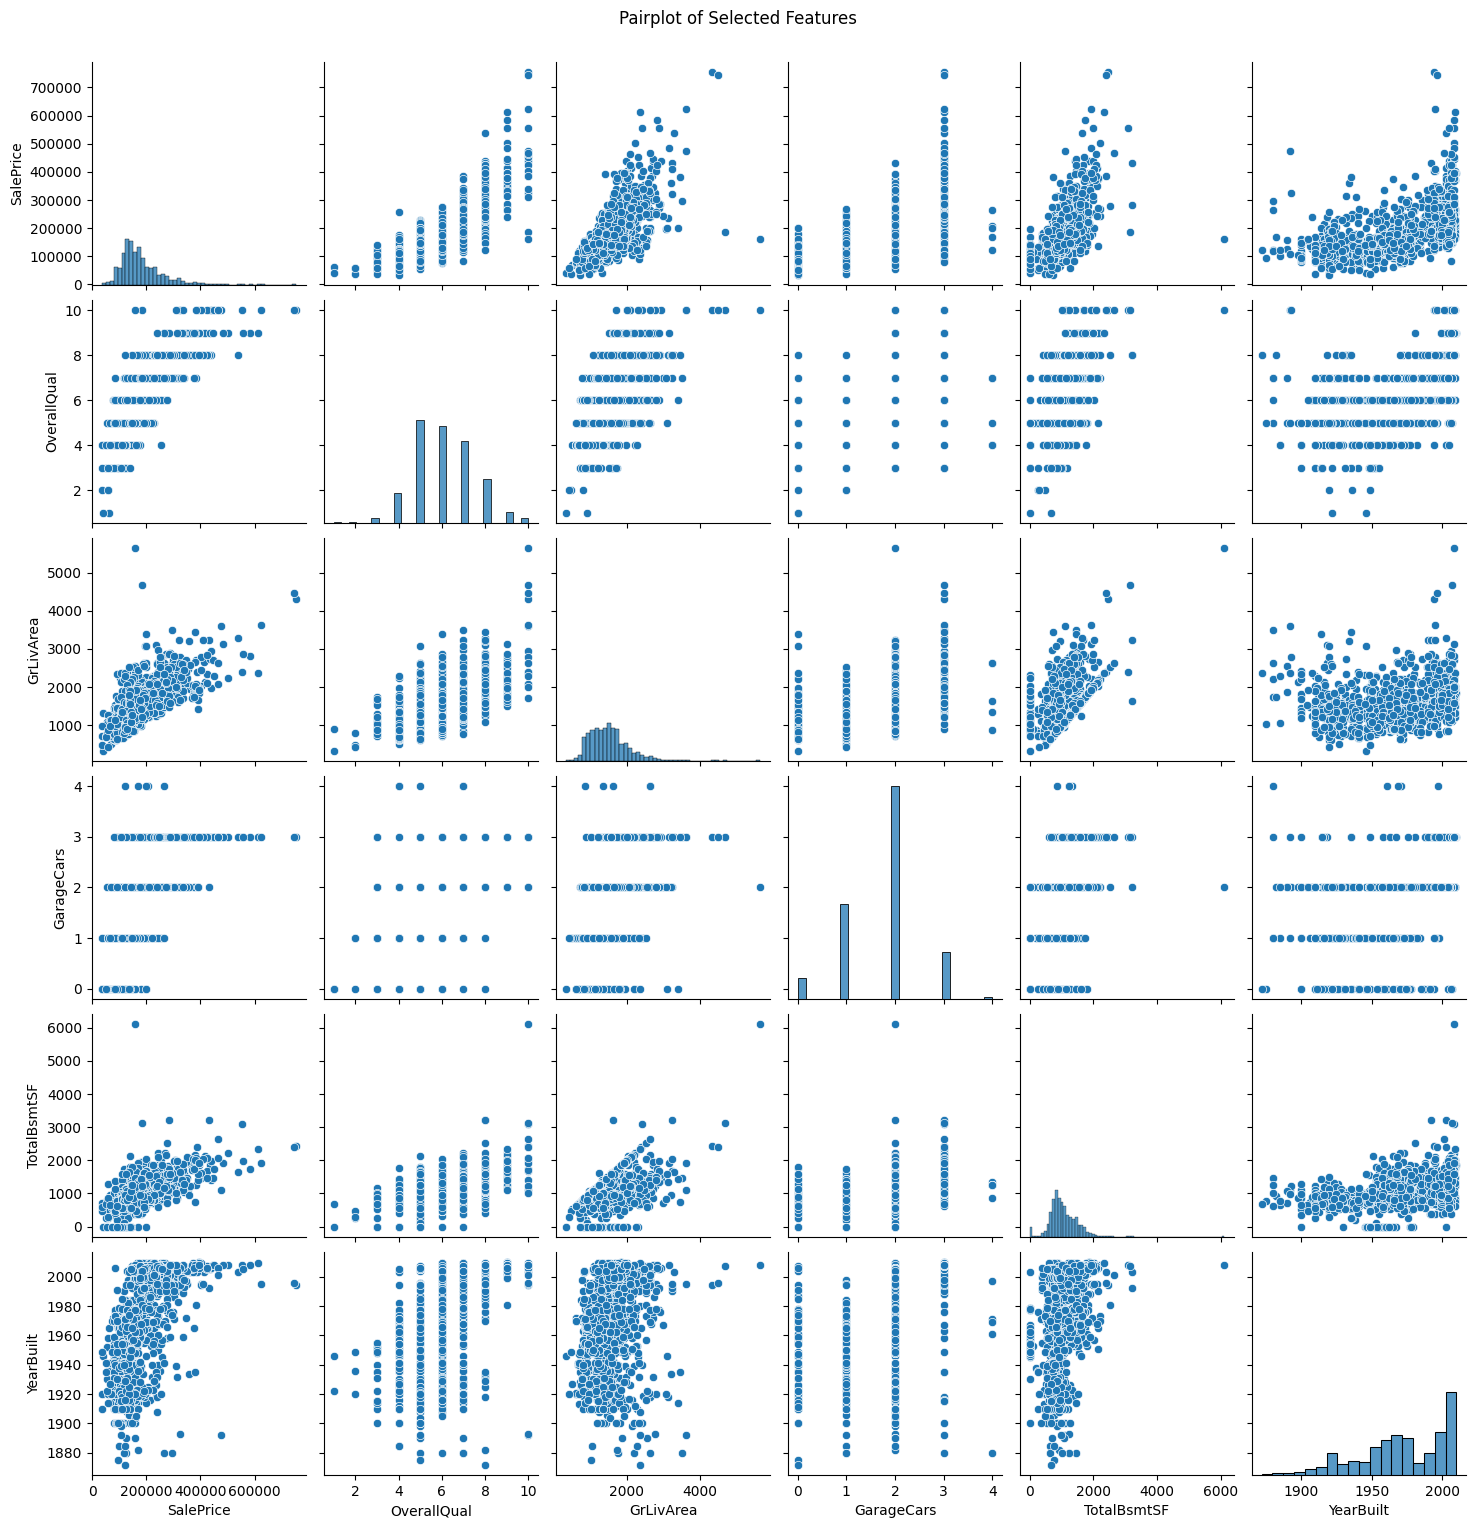

In [ ]:
# Pairplot of selected features
selected_features = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt']
sns.pairplot(df[selected_features], height=2.5)
plt.suptitle("Pairplot of Selected Features", y=1.02)
plt.show()

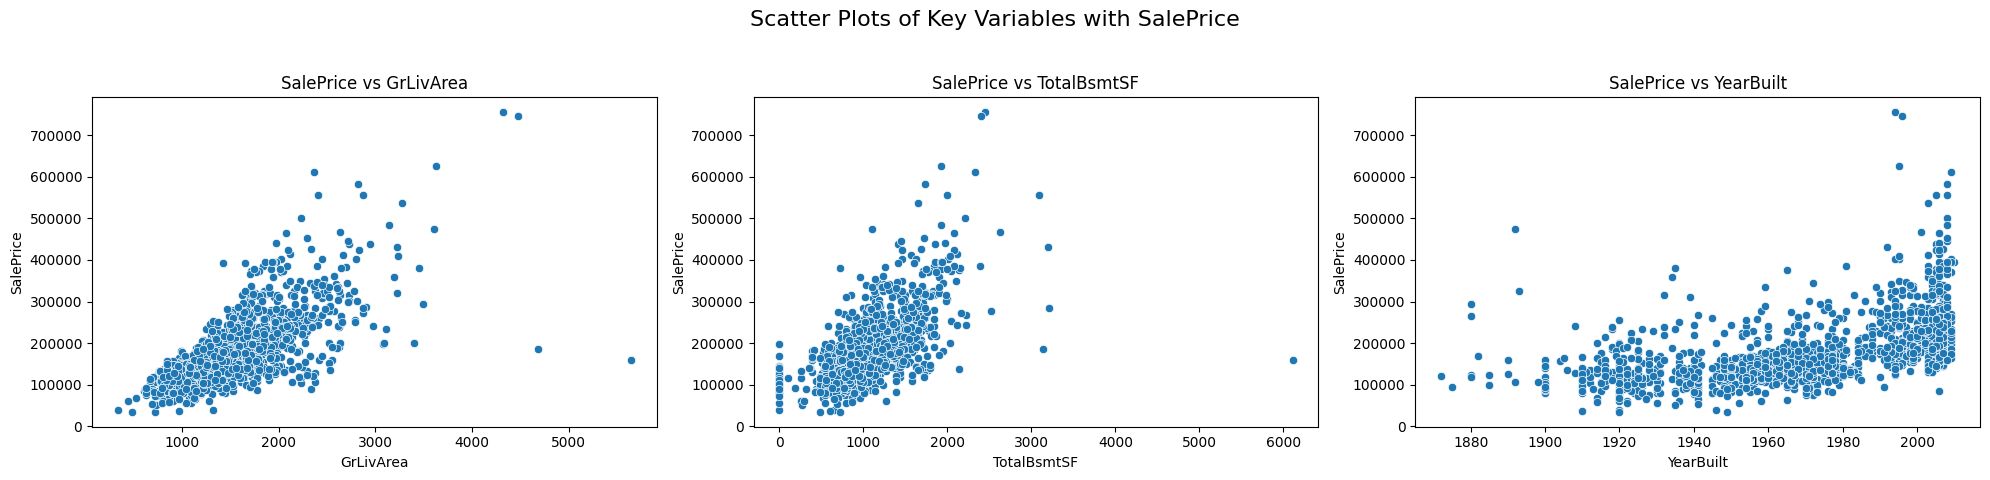

In [ ]:
# Scatter plots of key variables with SalePrice in a subplot format
def plot_scatter_subplots(df, vars_to_plot):
    num_vars = len(vars_to_plot)
    num_cols = 3  # Number of columns in the subplot
    num_rows = math.ceil(num_vars / num_cols)  # Calculate the number of rows needed

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
    fig.suptitle("Scatter Plots of Key Variables with SalePrice", fontsize=16)
    axes = axes.flatten()  # Flatten in case of a single row to handle axes indexing

    for i, var in enumerate(vars_to_plot):
        sns.scatterplot(x=df[var], y=df['SalePrice'], ax=axes[i])
        axes[i].set_title(f'SalePrice vs {var}', fontsize=12)

    # Turn off any unused subplots if the number of variables isn't a multiple of num_cols
    for j in range(i + 1, num_rows * num_cols):
        fig.delaxes(axes[j])

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to include main title
    plt.show()

plot_scatter_subplots(df, ['GrLivArea', 'TotalBsmtSF', 'YearBuilt'])

In [ ]:
# Display missing values
missing_data = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_df = pd.DataFrame({'Missing Values': missing_data, 'Percent': missing_percent})
print(missing_df.head(10))

              Missing Values    Percent
1stFlrSF                   0   0.000000
2ndFlrSF                   0   0.000000
3SsnPorch                  0   0.000000
Alley                   1369  93.767123
BedroomAbvGr               0   0.000000
BldgType                   0   0.000000
BsmtCond                  37   2.534247
BsmtExposure              38   2.602740
BsmtFinSF1                 0   0.000000
BsmtFinSF2                 0   0.000000


In [ ]:
# Fill in missing values
def handle_missing(features):
    features['Functional'] = features['Functional'].fillna('Typ')
    categorical_fill = ['Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType']
    for col in categorical_fill:
        features[col] = features[col].fillna(features[col].mode()[0])

    # Fill grouped missing values
    features['LotFrontage'] = features.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))
    features.update(features.select_dtypes(include=['float', 'int']).fillna(0))
    return features

df = handle_missing(df)

In [ ]:
# Feature creation
df['TotalSF'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
df['TotalBathrooms'] = (df['FullBath'] + 0.5 * df['HalfBath'] + df['BsmtFullBath'] + 0.5 * df['BsmtHalfBath'])
df['YearsSinceRemodel'] = (df['YrSold'] - df['YearRemodAdd']).clip(lower=0)  # Ensure no negative values
df['Total_Home_Quality'] = df['OverallQual'] + df['OverallCond']

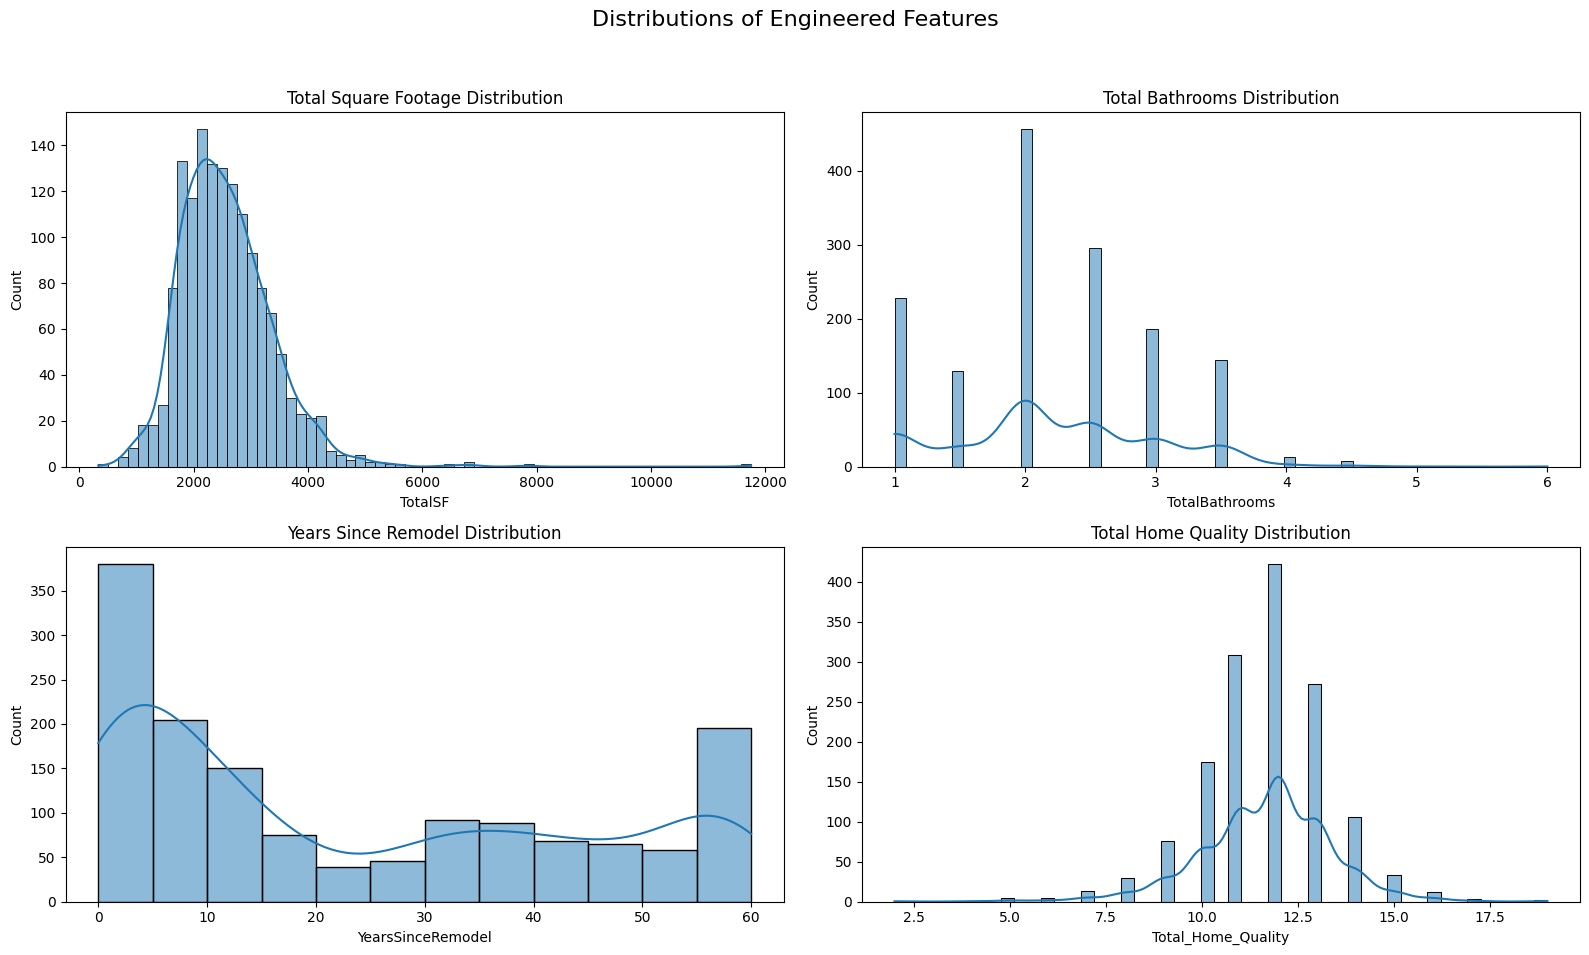

In [ ]:
# List of engineered features to plot
features_to_plot = ['TotalSF', 'TotalBathrooms', 'YearsSinceRemodel', 'Total_Home_Quality']
titles = ["Total Square Footage Distribution", "Total Bathrooms Distribution",
          "Years Since Remodel Distribution", "Total Home Quality Distribution"]

# Plot all engineered features in a single figure with subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))
fig.suptitle("Distributions of Engineered Features", fontsize=16)
axes = axes.flatten()

# Create individual histograms with KDE for each engineered feature
for i, feature in enumerate(features_to_plot):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(titles[i], fontsize=12)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()


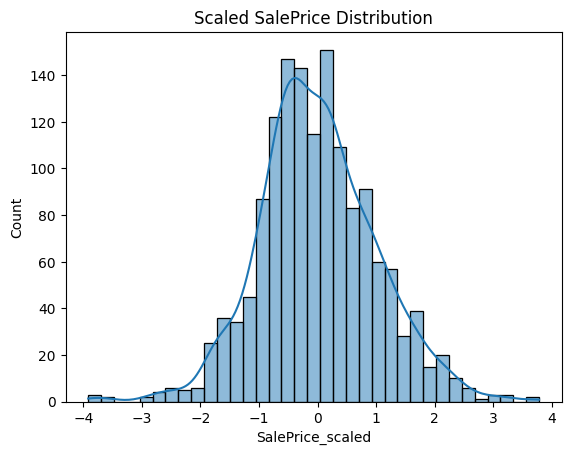

In [ ]:
# Scaling SalePrice
scaler = StandardScaler()
df[['SalePrice_scaled']] = scaler.fit_transform(df[['SalePrice']])

# Display transformed SalePrice
sns.histplot(df['SalePrice_scaled'], kde=True)
plt.title("Scaled SalePrice Distribution")
plt.show()

In [ ]:
print("Missing values in SalePrice_scaled after scaling:", df['SalePrice_scaled'].isnull().sum())

Missing values in SalePrice_scaled after scaling: 0


In [ ]:
# Step 1: Scale SalePrice independently to avoid interference
scaler = StandardScaler()
df['SalePrice_scaled'] = scaler.fit_transform(df[['SalePrice']])

# Step 2: Identify highly skewed numeric features (excluding 'SalePrice' and 'SalePrice_scaled')
skewed_features = df.select_dtypes(include=['float64', 'int64']).drop(columns=['SalePrice', 'SalePrice_scaled'])
skewed_features = skewed_features.apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Step 3: Apply log transformation to highly skewed features only
for feature in skew_index:
    df[feature] = np.log1p(df[feature])

# Verify log-transformed features and check 'SalePrice_scaled' dtype
print("Log-transformed features:", list(skew_index))
print("SalePrice_scaled dtype after transformations:", df['SalePrice_scaled'].dtype)
print("Any null values in SalePrice_scaled?", df['SalePrice_scaled'].isnull().any())


Log-transformed features: ['PoolArea', '3SsnPorch', 'LowQualFinSF', 'MiscVal', 'BsmtHalfBath', 'ScreenPorch', 'BsmtFinSF2', 'EnclosedPorch', 'KitchenAbvGr', 'HalfBath']
SalePrice_scaled dtype after transformations: float64
Any null values in SalePrice_scaled? False


In [ ]:
print("Any null values in SalePrice_scaled?", df['SalePrice_scaled'].isnull().any())

Any null values in SalePrice_scaled? False


In [ ]:
# Transform SalePrice using log transformation
df['Log_SalePrice'] = np.log1p(df['SalePrice'])

# Use 'Log_SalePrice' as target variable
y = df['Log_SalePrice']
X = df.select_dtypes(include=[np.number]).drop(columns=['SalePrice', 'SalePrice_scaled', 'Log_SalePrice'])

In [ ]:
# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Cross-validation setup
kf = KFold(n_splits=5, random_state=42, shuffle=True)

# Helper function for cross-validated RMSE
def cv_rmse(model, X=X_train, y=y_train):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kf))
    return rmse.mean()

In [ ]:
# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42)
}

Use /tmp/tmp0xtzcjju as temporary training directory


In [ ]:
### 1. Linear Regression (No Hyperparameter Tuning Needed)
print("### Linear Regression ###")

# Default Linear Regression
linear_regression = LinearRegression()
linear_regression.fit(X_train, y_train)
lr_default_score = cv_rmse(linear_regression)
print(f"Default Linear Regression RMSE: {lr_default_score:.4f}\n")

### Linear Regression ###
Default Linear Regression RMSE: 0.0114



In [ ]:
### 2. Ridge Regression
print("### Ridge Regression ###")

# Default Ridge
ridge_default = Ridge()
ridge_default.fit(X_train, y_train)
ridge_default_score = cv_rmse(ridge_default)
print(f"Default Ridge RMSE: {ridge_default_score:.4f}")

### Ridge Regression ###
Default Ridge RMSE: 0.0111


In [ ]:
# Tuned Ridge with hyperparameter tuning
ridge_params = {'alpha': [0.1, 1, 10, 100]}
ridge_grid = GridSearchCV(Ridge(), ridge_params, scoring='neg_mean_squared_error', cv=kf)
ridge_grid.fit(X_train, y_train)
ridge_best = ridge_grid.best_estimator_
ridge_best_score = np.sqrt(-ridge_grid.best_score_)
print(f"Tuned Ridge RMSE: {ridge_best_score:.4f} with alpha: {ridge_grid.best_params_['alpha']}\n")

Tuned Ridge RMSE: 0.0110 with alpha: 10



In [ ]:
### 3. Lasso Regression
print("### Lasso Regression ###")

# Default Lasso
lasso_default = Lasso()
lasso_default.fit(X_train, y_train)
lasso_default_score = cv_rmse(lasso_default)
print(f"Default Lasso RMSE: {lasso_default_score:.4f}")

### Lasso Regression ###
Default Lasso RMSE: 0.0235


In [ ]:
# Tuned Lasso with hyperparameter tuning
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10]}
lasso_grid = GridSearchCV(Lasso(), lasso_params, scoring='neg_mean_squared_error', cv=kf)
lasso_grid.fit(X_train, y_train)
lasso_best = lasso_grid.best_estimator_
lasso_best_score = np.sqrt(-lasso_grid.best_score_)
print(f"Tuned Lasso RMSE: {lasso_best_score:.4f} with alpha: {lasso_grid.best_params_['alpha']}\n")

Tuned Lasso RMSE: 0.0121 with alpha: 0.001



In [ ]:
### 4. Random Forest
print("### Random Forest ###")

# Default Random Forest
random_forest_default = RandomForestRegressor(random_state=42)
random_forest_default.fit(X_train, y_train)
rf_default_score = cv_rmse(random_forest_default)
print(f"Default Random Forest RMSE: {rf_default_score:.4f}")

### Random Forest ###
Default Random Forest RMSE: 0.0114


In [ ]:
# Tuned Random Forest with hyperparameter tuning
rf_params = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf_grid = GridSearchCV(RandomForestRegressor(random_state=42), rf_params, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
rf_grid.fit(X_train, y_train)
rf_best = rf_grid.best_estimator_
rf_best_score = np.sqrt(-rf_grid.best_score_)
print(f"Tuned Random Forest RMSE: {rf_best_score:.4f} with params: {rf_grid.best_params_}\n")

Tuned Random Forest RMSE: 0.0114 with params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}



In [ ]:
### 5. XGBoost
print("### XGBoost ###")

# Default XGBoost
xgb_default = XGBRegressor(random_state=42)
xgb_default.fit(X_train, y_train)
xgb_default_score = cv_rmse(xgb_default)
print(f"Default XGBoost RMSE: {xgb_default_score:.4f}")

### XGBoost ###
Default XGBoost RMSE: 0.0119


In [ ]:
# Tuned XGBoost with hyperparameter tuning
xgb_params = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_grid = GridSearchCV(XGBRegressor(random_state=42), xgb_params, scoring='neg_mean_squared_error', cv=kf, n_jobs=-1)
xgb_grid.fit(X_train, y_train)
xgb_best = xgb_grid.best_estimator_
xgb_best_score = np.sqrt(-xgb_grid.best_score_)
print(f"Tuned XGBoost RMSE: {xgb_best_score:.4f} with params: {xgb_grid.best_params_}\n")

Tuned XGBoost RMSE: 0.0105 with params: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}



In [ ]:
### Summary of Results
print("### Model Comparison Summary ###")
results = {
    "Linear Regression (Default)": lr_default_score,
    "Ridge (Default)": ridge_default_score,
    "Ridge (Tuned)": ridge_best_score,
    "Lasso (Default)": lasso_default_score,
    "Lasso (Tuned)": lasso_best_score,
    "Random Forest (Default)": rf_default_score,
    "Random Forest (Tuned)": rf_best_score,
    "XGBoost (Default)": xgb_default_score,
    "XGBoost (Tuned)": xgb_best_score
}

# Print all results
for model, score in results.items():
    print(f"{model}: {score:.4f}")

### Model Comparison Summary ###
Linear Regression (Default): 0.0114
Ridge (Default): 0.0111
Ridge (Tuned): 0.0110
Lasso (Default): 0.0235
Lasso (Tuned): 0.0121
Random Forest (Default): 0.0114
Random Forest (Tuned): 0.0114
XGBoost (Default): 0.0119
XGBoost (Tuned): 0.0105


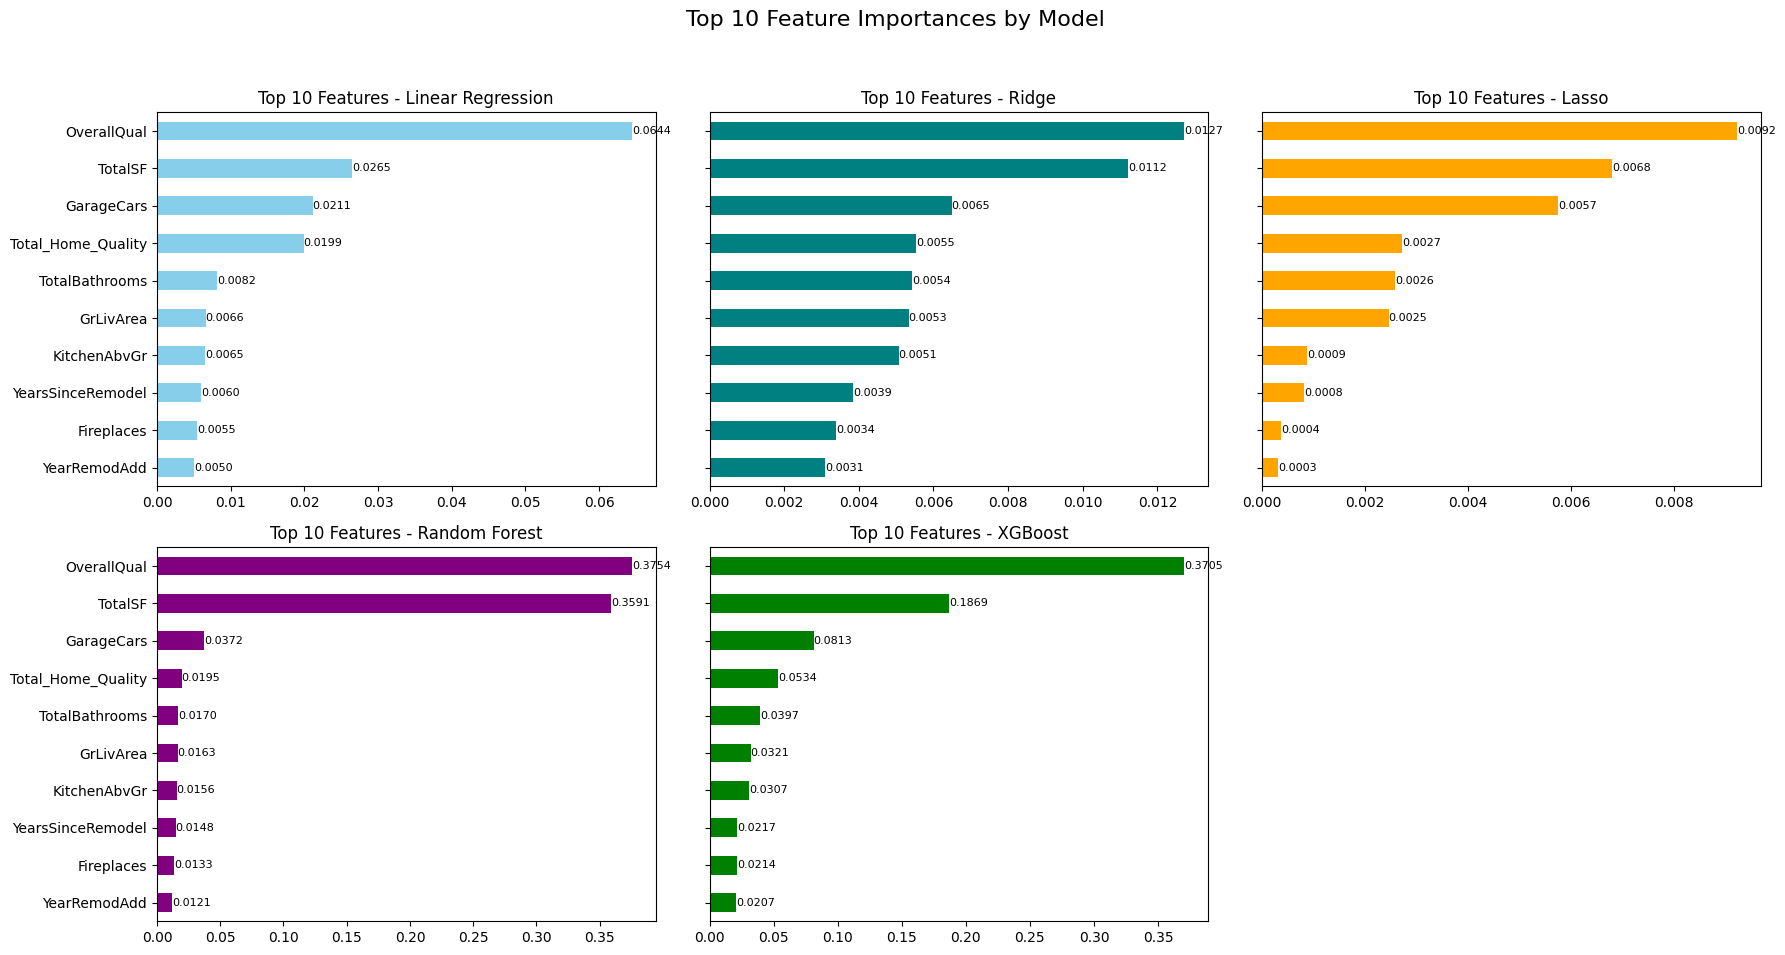

In [ ]:
# Get feature importances for models that support it
def get_feature_importance(model, X, top_n=10):
    if hasattr(model, "coef_"):  # Linear models with coefficients
        importance = pd.Series(abs(model.coef_), index=X.columns).sort_values(ascending=False).head(top_n)
    elif hasattr(model, "feature_importances_"):  # Tree-based models
        importance = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False).head(top_n)
    else:
        importance = pd.Series()  # Empty Series if feature importance is not available
    return importance

# Plot feature importances with labels
def plot_feature_importance(importances, ax, title, color):
    importances.plot(kind='barh', ax=ax, color=color)
    ax.set_title(title)
    ax.invert_yaxis()
    for i, (value, name) in enumerate(zip(importances.values, importances.index)):
        ax.text(value, i, f"{value:.4f}", ha='left', va='center', fontsize=8)

# Initialize figure for subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10), sharey=True)
fig.suptitle("Top 10 Feature Importances by Model", fontsize=16)

# Define models and colors
models = {
    "Linear Regression": linear_regression,
    "Ridge": ridge_best,
    "Lasso": lasso_best,
    "Random Forest": rf_best,
    "XGBoost": xgb_best
}
colors = ["skyblue", "teal", "orange", "purple", "green"]

# Plot feature importances for each model
for i, (name, model) in enumerate(models.items()):
    importances = get_feature_importance(model, X_train)
    plot_feature_importance(importances, axes[i // 3, i % 3], f"Top 10 Features - {name}", colors[i])

# Remove the empty subplot
fig.delaxes(axes[1, 2])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout for main title
plt.show()

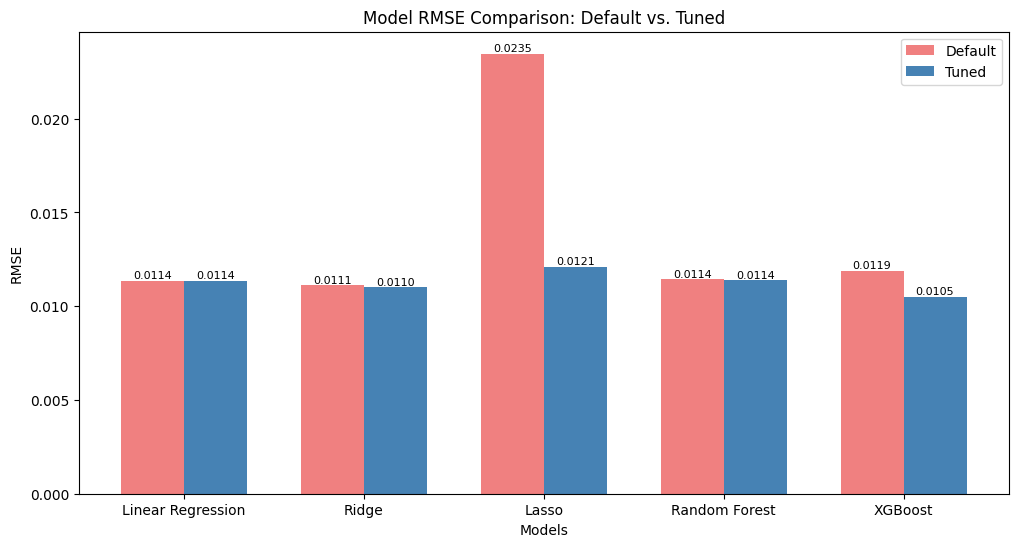

In [ ]:
# Define models and RMSE data
models = ["Linear Regression", "Ridge", "Lasso", "Random Forest", "XGBoost"]
rmse_default = [lr_default_score, ridge_default_score, lasso_default_score, rf_default_score, xgb_default_score]
rmse_tuned = [lr_default_score, ridge_best_score, lasso_best_score, rf_best_score, xgb_best_score]

# Parameters for clustered column chart
bar_width = 0.35
index = np.arange(len(models))

# Create clustered column chart
fig, ax = plt.subplots(figsize=(12, 6))

# Plot Default and Tuned bars side by side
bars_default = ax.bar(index - bar_width / 2, rmse_default, bar_width, label='Default', color='lightcoral')
bars_tuned = ax.bar(index + bar_width / 2, rmse_tuned, bar_width, label='Tuned', color='steelblue')

# Labels and Title
ax.set_xlabel('Models')
ax.set_ylabel('RMSE')
ax.set_title('Model RMSE Comparison: Default vs. Tuned')
ax.set_xticks(index)
ax.set_xticklabels(models)
ax.legend()

# Data labels in small font
for bars in [bars_default, bars_tuned]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}',
                ha='center', va='bottom', fontsize=8)

# Display the chart
plt.show()

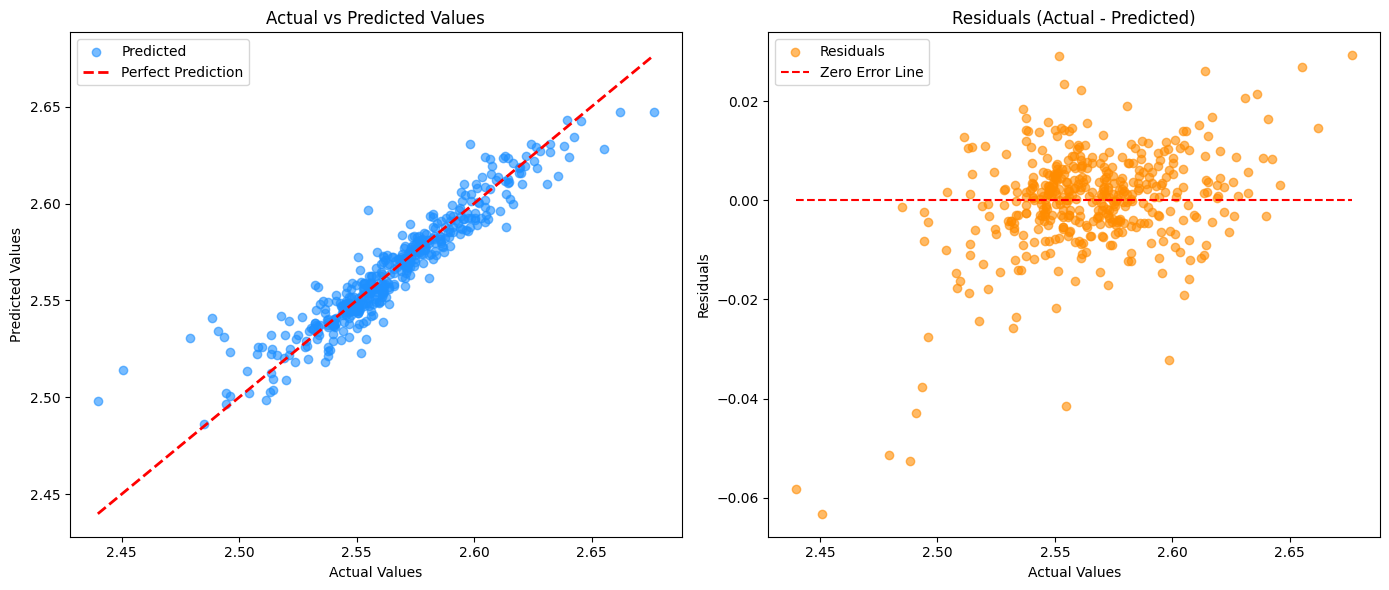

In [ ]:
# Step 1: Train the tuned XGBoost model on the entire training set (if not done previously)
xgb_best.fit(X_train, y_train)

# Step 2: Predict on the test set
y_pred = xgb_best.predict(X_test)

# Step 3: Calculate the RMSE for predictions to compare to our previous metric
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
# print(f"Test RMSE for Tuned XGBoost: {rmse_test:.4f}")

# Step 4: Plot Actual vs Predicted and Residuals in subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Plot Actual vs Predicted
axs[0].scatter(y_test, y_pred, alpha=0.6, color='dodgerblue', label='Predicted')
axs[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2, label='Perfect Prediction')
axs[0].set_xlabel('Actual Values')
axs[0].set_ylabel('Predicted Values')
axs[0].set_title('Actual vs Predicted Values')
axs[0].legend()

# Plot Residuals (Differences)
residuals = y_test - y_pred
axs[1].scatter(y_test, residuals, alpha=0.6, color='darkorange', label='Residuals')
axs[1].hlines(0, y_test.min(), y_test.max(), colors='red', linestyles='dashed', label='Zero Error Line')
axs[1].set_xlabel('Actual Values')
axs[1].set_ylabel('Residuals')
axs[1].set_title('Residuals (Actual - Predicted)')
axs[1].legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import r2_score

# Calculate R² Score
r2 = r2_score(y_test, y_pred)
print(f"R² Score: {r2:.4f}")

R² Score: 0.8886
